<a href="https://colab.research.google.com/github/Aguinaldo-Alberto-Naldo/Aguinaldo-Alberto-Naldo1/blob/main/An%C3%A1lise_de_dados_com_Pandas_Trabalhando_com_datas_e_gr%C3%A1ficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df= pd.read_csv('/dataset_vendas_alimentares_20.csv')

In [17]:
from typing import Text
#transformar a coluna de data em inteiro
df['Date'] = df['Date'].astype(Text)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sale_ID        20 non-null     int64  
 1   Date           20 non-null     object 
 2   Product        20 non-null     object 
 3   Category       20 non-null     object 
 4   Quantity       20 non-null     int64  
 5   Unit_Price_KZ  20 non-null     float64
 6   Total_KZ       20 non-null     float64
 7   Region         20 non-null     object 
 8   Salesperson    20 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.5+ KB


In [6]:
df.head

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson
0,1,2025-07-23,Banana,Laticínios,42,778.21,32684.82,Benguela,Ana
1,2,2025-06-20,Peixe,Outros,46,3870.74,178054.04,Namibe,Marta
2,3,2025-03-26,Massa,Bebidas,29,4834.25,140193.25,Huambo,Pedro
3,4,2025-03-16,Ovos,Bebidas,40,4014.74,160589.60,Namibe,Manuel
4,5,2025-03-28,Arroz,Bebidas,4,4232.32,16929.28,Huambo,Marta


In [21]:
#transformando coluna de data em data
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.sample()

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson
9,10,2024-08-24,Massa,Grãos,24,4843.01,116232.24,Luanda,Carlos


In [27]:
#Agrupar os dados para saber o faturamento por ano
df.groupby(df['Date'].dt.year)['Total_KZ'].sum()

,Total_KZ
Date,
2024,705544.20
2025,876390.85


In [29]:
#Estraindo o mês e o dia da data
df['month_of_year'] = df['Date'].dt.month
df['day_of_month'] = df['Date'].dt.day

In [30]:
df.sample()

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson,month_of_year,day_of_month
2,3,2025-03-26,Massa,Bebidas,29,4834.25,140193.25,Huambo,Pedro,3,26


In [32]:
#Calculando a diferênça entre dias
df['date_diff_day'] = df['Date'] - df['Date'].min()

In [33]:
df.sample()

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson,month_of_year,day_of_month,date_diff_day
5,6,2025-05-02,Massa,Carnes,48,416.03,19969.44,Huambo,Marta,5,2,464 days


In [34]:
#calculando o trimestre
df['quarter_of_year'] = df['Date'].dt.quarter

In [38]:
df.sample(5)

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson,month_of_year,day_of_month,date_diff_day,quarter_of_year
11,12,2024-08-14,Frango,Frutas,47,2979.74,140047.78,Namibe,Ana,8,14,203 days,3
18,19,2024-01-24,Queijo,Frutas,26,562.38,14621.88,Lubango,Manuel,1,24,0 days,1
12,13,2024-06-09,Frango,Laticínios,31,4441.18,137676.58,Huambo,José,6,9,137 days,2
9,10,2024-08-24,Massa,Grãos,24,4843.01,116232.24,Luanda,Carlos,8,24,213 days,3
10,11,2024-05-23,Farinha,Frutas,40,3936.06,157442.40,Luanda,Sara,5,23,120 days,2


In [40]:
 # Filtrando as vendas de um determinado ano e um determinado mes
 df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month == 5)]

,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson,month_of_year,day_of_month,date_diff_day,quarter_of_year
7,8,2024-05-10,Manteiga,Laticínios,12,4673.44,56081.28,Lubango,Carlos,5,10,107 days,2
10,11,2024-05-23,Farinha,Frutas,40,3936.06,157442.40,Luanda,Sara,5,23,120 days,2


In [42]:
# mostrar a contagem de vendas por categorias
df['Salesperson'].value_counts()

,count
Salesperson,
Ana,3
Marta,3
Pedro,3
Manuel,3
Carlos,3
Joaquim,1
Sara,1
José,1
Beatriz,1


## **VISUALIZAÇÃO DE DADOS**

<Axes: xlabel='Salesperson'>

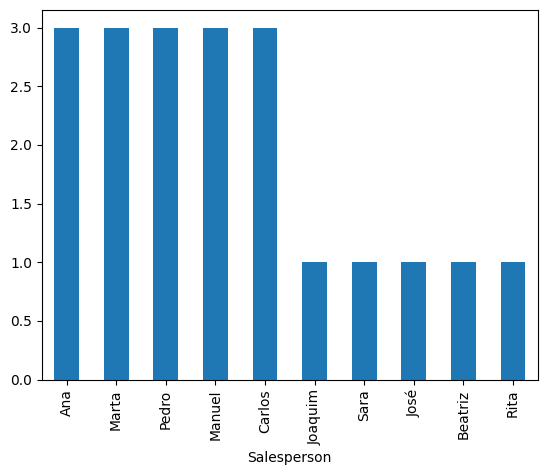

In [44]:
# mostrar grafico com a contagem de vendas por categorias com Gráfico de barras vertical
df['Salesperson'].value_counts().plot.bar()

<Axes: ylabel='Salesperson'>

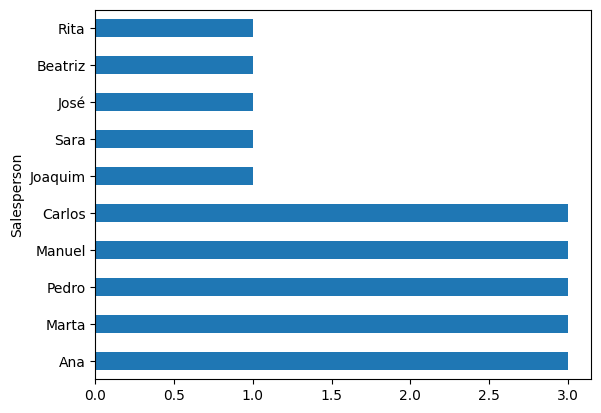

In [45]:
# mostrar grafico com a contagem de vendas por categorias com Gráfico de barras horizontal
df['Salesperson'].value_counts().plot.barh()

<Axes: ylabel='count'>

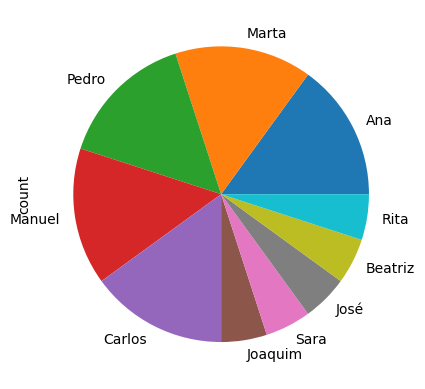

In [48]:
# mostrar grafico com a contagem de vendas por categorias com Gráfico de Pizza
df['Salesperson'].value_counts().plot.pie()

<Axes: ylabel='count'>

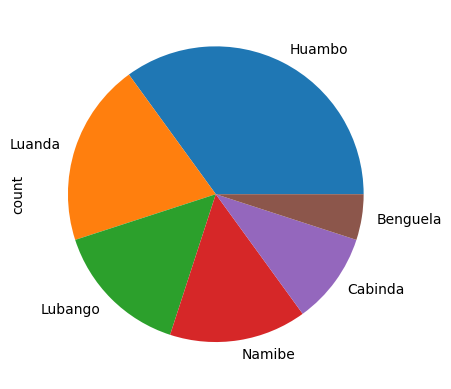

In [50]:
# mostrar grafico com a contagem de vendas por provincia
df['Region'].value_counts().plot.pie()

Text(0, 0.5, 'Vendedores')

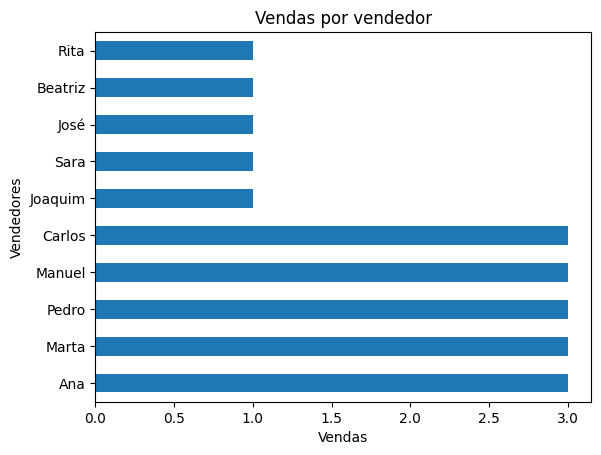

In [55]:
# Adicionar um titulo e mudando o nome dos eixos
import matplotlib.pyplot as plt
df['Salesperson'].value_counts().plot.barh()
plt.title('Vendas por vendedor')
plt.xlabel('Vendas')
plt.ylabel('Vendedores')

Text(0, 0.5, 'Vendedores')

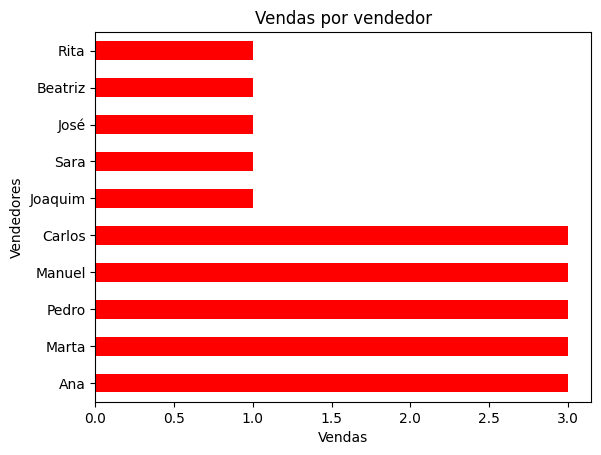

In [56]:
#alterando a cor das linhas do gráfico
df['Salesperson'].value_counts().plot.barh(color='red')
plt.title('Vendas por vendedor')
plt.xlabel('Vendas')
plt.ylabel('Vendedores')

In [58]:
plt.style.use('ggplot')


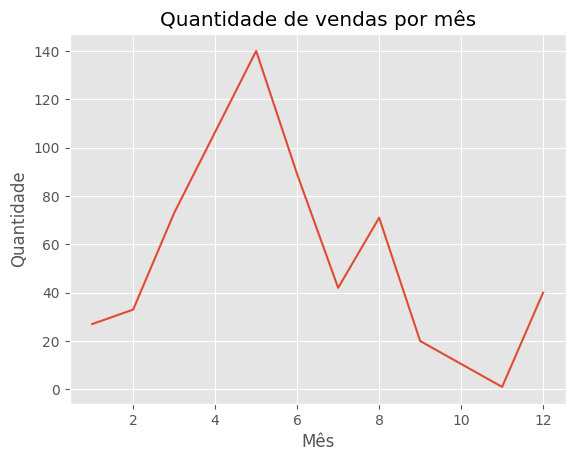

In [64]:
#agrupar por mês e quantidade e mostrar o grafico pie com o estlio ggplot
df.groupby(df['Date'].dt.month)['Quantity'].sum().plot(title='Quantidade de vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Quantidade de vendas por mês')
plt.style.use('ggplot')

In [65]:
#colocar o mes corresponte ao numero na coluna do mes
df['month'] = df['Date'].dt.month_name()

df.head()


,Sale_ID,Date,Product,Category,Quantity,Unit_Price_KZ,Total_KZ,Region,Salesperson,month_of_year,day_of_month,date_diff_day,quarter_of_year,month
0,1,2025-07-23,Banana,Laticínios,42,778.21,32684.82,Benguela,Ana,7,23,546 days,3,July
1,2,2025-06-20,Peixe,Outros,46,3870.74,178054.04,Namibe,Marta,6,20,513 days,2,June
2,3,2025-03-26,Massa,Bebidas,29,4834.25,140193.25,Huambo,Pedro,3,26,427 days,1,March
3,4,2025-03-16,Ovos,Bebidas,40,4014.74,160589.60,Namibe,Manuel,3,16,417 days,1,March
4,5,2025-03-28,Arroz,Bebidas,4,4232.32,16929.28,Huambo,Marta,3,28,429 days,1,March


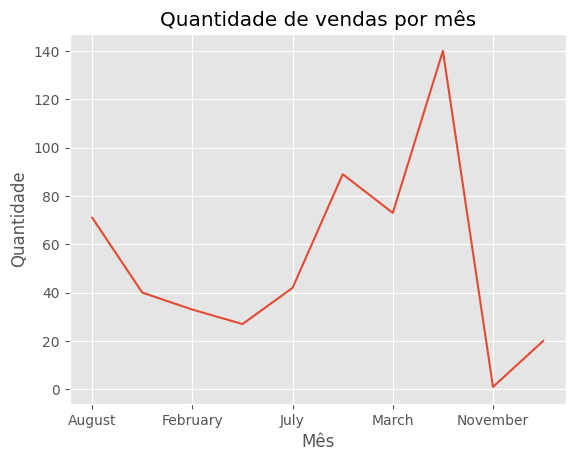

In [67]:
#agrupar por mês e quantidade e mostrar o grafico pie com o estlio ggplot
df.groupby(df['month'])['Quantity'].sum().plot(title='Quantidade de vendas por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Quantidade de vendas por mês')
plt.style.use('ggplot')

In [73]:
#selecionar apenas vendas de 2024
df_2024 = df[df['Date'].dt.year == 2024]

Text(0.5, 1.0, 'Quantidade de vendas por mês')

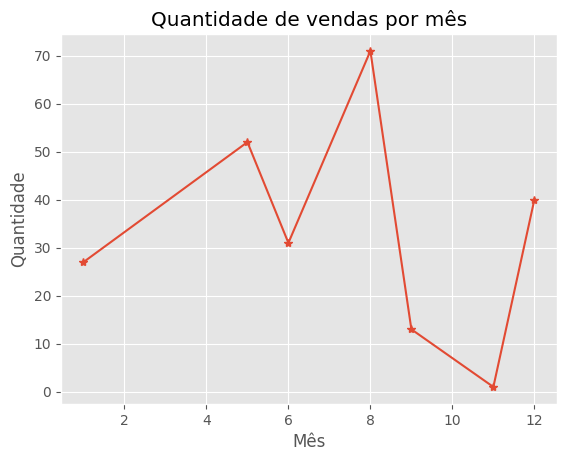

In [75]:
#Total de produtos vendidos por mes no ano de 2024 com o grafico e toda a legenda adicionando Marcadores no Gr[afico]
df_2024.groupby(df_2024['Date'].dt.month)['Quantity'].sum().plot(title='Quantidade de vendas por mês', marker='*')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.title('Quantidade de vendas por mês')

<Axes: ylabel='Frequency'>

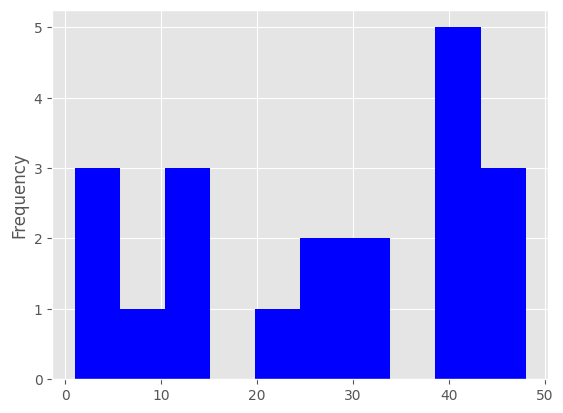

In [78]:
#histograma com quantidade de produtos vendidos
df['Quantity'].plot.hist(color='blue')

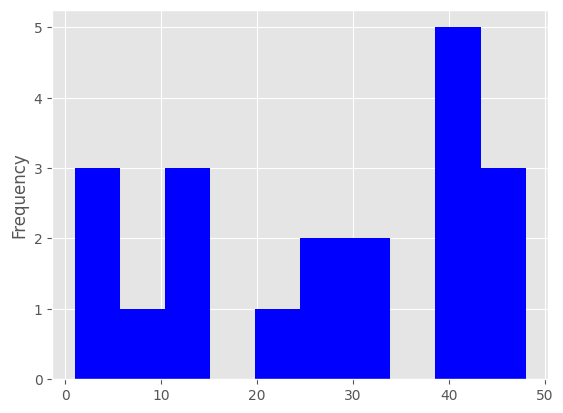

In [79]:
#salvar em PNG
df['Quantity'].plot.hist(color='blue')
plt.savefig('histograma.png')

<Axes: xlabel='day_of_month', ylabel='Total_KZ'>

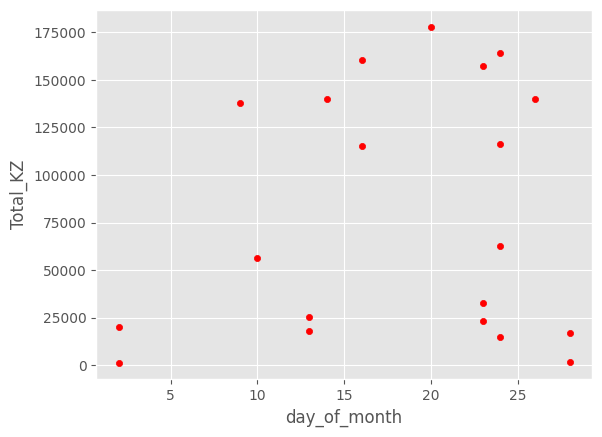

In [81]:
#colocar o dia da venda e o total da venda no grafico de dispersão
df.plot.scatter(x='day_of_month', y='Total_KZ', color='red')
